In [113]:
import pandas as pd
from autogluon.tabular import TabularPredictor, TabularDataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

# LOADING THE DATA

*Setting the API Token Location*

In [114]:
kaggle_token = r"C:\Users\ASUS ROG\.kaggle\kaggle.json"

*Check if file exists*

In [115]:
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

*Note: Since my C: name has a space .envrion method eliminates the error*

In [116]:
os.environ["KAGGLE_CONFIG_DIR"] = r"C:\Users\ASUS ROG\.kaggle"

*Installing Kaggle and Download zipped data*

In [117]:
!pip install kaggle
!kaggle competitions download -c bike-sharing-demand

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


*Unzipping File*

In [118]:
with zipfile.ZipFile('bike-sharing-demand.zip', 'r') as zip_r:
	zip_r.extractall('.')
	print("Data is extracted to the current folder as train and test csv")

Data is extracted to the current folder as train and test csv


*Random Seed for Reproducibility*

In [119]:
np.random.seed(99)

*Loading the Datasets*

In [120]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

*Checking the Datasets*

In [121]:
df_train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [122]:
df_test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


*Dropping the casual and registered columns*

In [123]:
train = df_train.drop(columns=['casual', 'registered'], axis=1)

*Renaming the df_test DataFrame to test*

In [124]:
test = df_test

*Checking the length of the Datasets*

In [125]:
train.shape

(10886, 10)

In [126]:
test.shape

(6493, 9)

# INITIAL MODEL

*Converting DataFrames to TabularDatasets for Autogluon*

In [127]:
train_data = TabularDataset(train)
test_data = TabularDataset(test)

*Training first model (Default Model, No EDA, No Feature Engineering)*

In [128]:
predictor_1 = TabularPredictor(label='count').fit(train_data=train)


No path specified. Models will be saved in: "AutogluonModels\ag-20250323_102154"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          16
Memory Avail:       7.17 GB / 15.42 GB (46.5%)
Disk Space Avail:   83.54 GB / 456.29 GB (18.3%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         

[1000]	valid_set's rmse: 136.065


	-135.958	 = Validation score   (-root_mean_squared_error)
	1.37s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM ...
	-134.0804	 = Validation score   (-root_mean_squared_error)
	0.9s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-122.0136	 = Validation score   (-root_mean_squared_error)
	1.2s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: CatBoost ...
	-134.2362	 = Validation score   (-root_mean_squared_error)
	4.96s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-128.4202	 = Validation score   (-root_mean_squared_error)
	0.68s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-136.7771	 = Validation score   (-root_mean_squared_error)
	7.14s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-135.769	 = Validation score   (-root_mean_squared_error)
	0.48s	 = Training   runtime
	0.01s	 = Validation r

*Summary of initial training*

In [129]:
display(predictor_1.fit_summary())

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        KNeighborsDist  -92.389673  root_mean_squared_error       0.021853   0.027817                0.021853           0.027817            1       True          2
1   WeightedEnsemble_L2  -92.389673  root_mean_squared_error       0.022853   0.043822                0.000999           0.016005            2       True         12
2        KNeighborsUnif -109.626075  root_mean_squared_error       0.027605   0.027740                0.027605           0.027740            1       True          1
3       RandomForestMSE -122.013622  root_mean_squared_error       0.047691   1.203450                0.047691           1.203450            1       True          5
4         ExtraTreesMSE -128.420222  root_mean_squared_error       0.046677   0.684155                0.046677   

d:\miniconda3\envs\auto_python310\lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
d:\miniconda3\envs\auto_python310\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -109.62607530626073,
  'KNeighborsDist': -92.38967289813668,
  'LightGBMXT': -135.95803375936984,
  'LightGBM': -134.0804268849742,
  'RandomForestMSE': -122.01362204763117,
  'CatBoost': -134.23616330181272,
  'ExtraTreesMSE': -128.42022189393495,
  'NeuralNetFastAI': -136.77705987188926,
  'XGBoost': -135.7689524728067,
  'NeuralNetTorch': -138.391912989268,
  'LightGBMLarge': -130.52882934609937,
  'WeightedEnsemble_L2': -92.38967289813668},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KNe

In [130]:
display(predictor_1.leaderboard(silent=True))

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,-92.389673,root_mean_squared_error,0.021853,0.027817,0.021853,0.027817,1,True,2
1,WeightedEnsemble_L2,-92.389673,root_mean_squared_error,0.022853,0.043822,0.000999,0.016005,2,True,12
2,KNeighborsUnif,-109.626075,root_mean_squared_error,0.027605,0.027740,0.027605,0.027740,1,True,1
3,RandomForestMSE,-122.013622,root_mean_squared_error,0.047691,1.203450,0.047691,1.203450,1,True,5
4,ExtraTreesMSE,-128.420222,root_mean_squared_error,0.046677,0.684155,0.046677,0.684155,1,True,7
5,LightGBMLarge,-130.528829,root_mean_squared_error,0.007002,1.496194,0.007002,1.496194,1,True,11
6,LightGBM,-134.080427,root_mean_squared_error,0.007002,0.896635,0.007002,0.896635,1,True,4
7,CatBoost,-134.236163,root_mean_squared_error,0.002001,4.960079,0.002001,4.960079,1,True,6
8,XGBoost,-135.768952,root_mean_squared_error,0.005523,0.483948,0.005523,0.483948,1,True,9
9,LightGBMXT,-135.958034,root_mean_squared_error,0.015388,1.368110,0.015388,1.368110,1,True,3


# KAGGLE SUBMISSION (1)

*Predicting on test set*

In [131]:
predictor_1_preds = predictor_1.predict(test_data)

<!-- *Submission file creation* -->

*Creating pandas dataframe for submission*

In [132]:
submission_1 = pd.DataFrame(
{
	'datetime' : df_test['datetime'],
	'count' : predictor_1_preds
})

*Saving submission*

In [133]:
submission_1.to_csv('initial_submission_resubmission.csv', index=False)

*Submitting to kaggle initial submission*

In [134]:
!kaggle competitions submit -c bike-sharing-demand -f initial_submission_resubmission.csv -m "Initial Submission Resubmission"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  8%|▊         | 16.0k/195k [00:00<00:02, 76.7kB/s]
 58%|█████▊    | 112k/195k [00:00<00:00, 362kB/s]  
100%|██████████| 195k/195k [00:01<00:00, 166kB/s]


*First Initial Model Leaderboard*

In [135]:
predictor_1.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,-92.389673,root_mean_squared_error,0.021853,0.027817,0.021853,0.027817,1,True,2
1,WeightedEnsemble_L2,-92.389673,root_mean_squared_error,0.022853,0.043822,0.000999,0.016005,2,True,12
2,KNeighborsUnif,-109.626075,root_mean_squared_error,0.027605,0.027740,0.027605,0.027740,1,True,1
3,RandomForestMSE,-122.013622,root_mean_squared_error,0.047691,1.203450,0.047691,1.203450,1,True,5
4,ExtraTreesMSE,-128.420222,root_mean_squared_error,0.046677,0.684155,0.046677,0.684155,1,True,7
5,LightGBMLarge,-130.528829,root_mean_squared_error,0.007002,1.496194,0.007002,1.496194,1,True,11
6,LightGBM,-134.080427,root_mean_squared_error,0.007002,0.896635,0.007002,0.896635,1,True,4
7,CatBoost,-134.236163,root_mean_squared_error,0.002001,4.960079,0.002001,4.960079,1,True,6
8,XGBoost,-135.768952,root_mean_squared_error,0.005523,0.483948,0.005523,0.483948,1,True,9
9,LightGBMXT,-135.958034,root_mean_squared_error,0.015388,1.368110,0.015388,1.368110,1,True,3


# EDA and Feature Engineering

*Getting dataset information*

In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


<!-- *Missing Value check* -->

*Missing value check*

In [137]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

In [138]:
test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

<!-- *Unique Value check* -->

*Unique values check*

In [139]:
train.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
count           822
dtype: int64

In [140]:
test.nunique()

datetime      6493
season           4
holiday          2
workingday       2
weather          4
temp            49
atemp           65
humidity        79
windspeed       27
dtype: int64

*Visualizing the bike rental distribution*

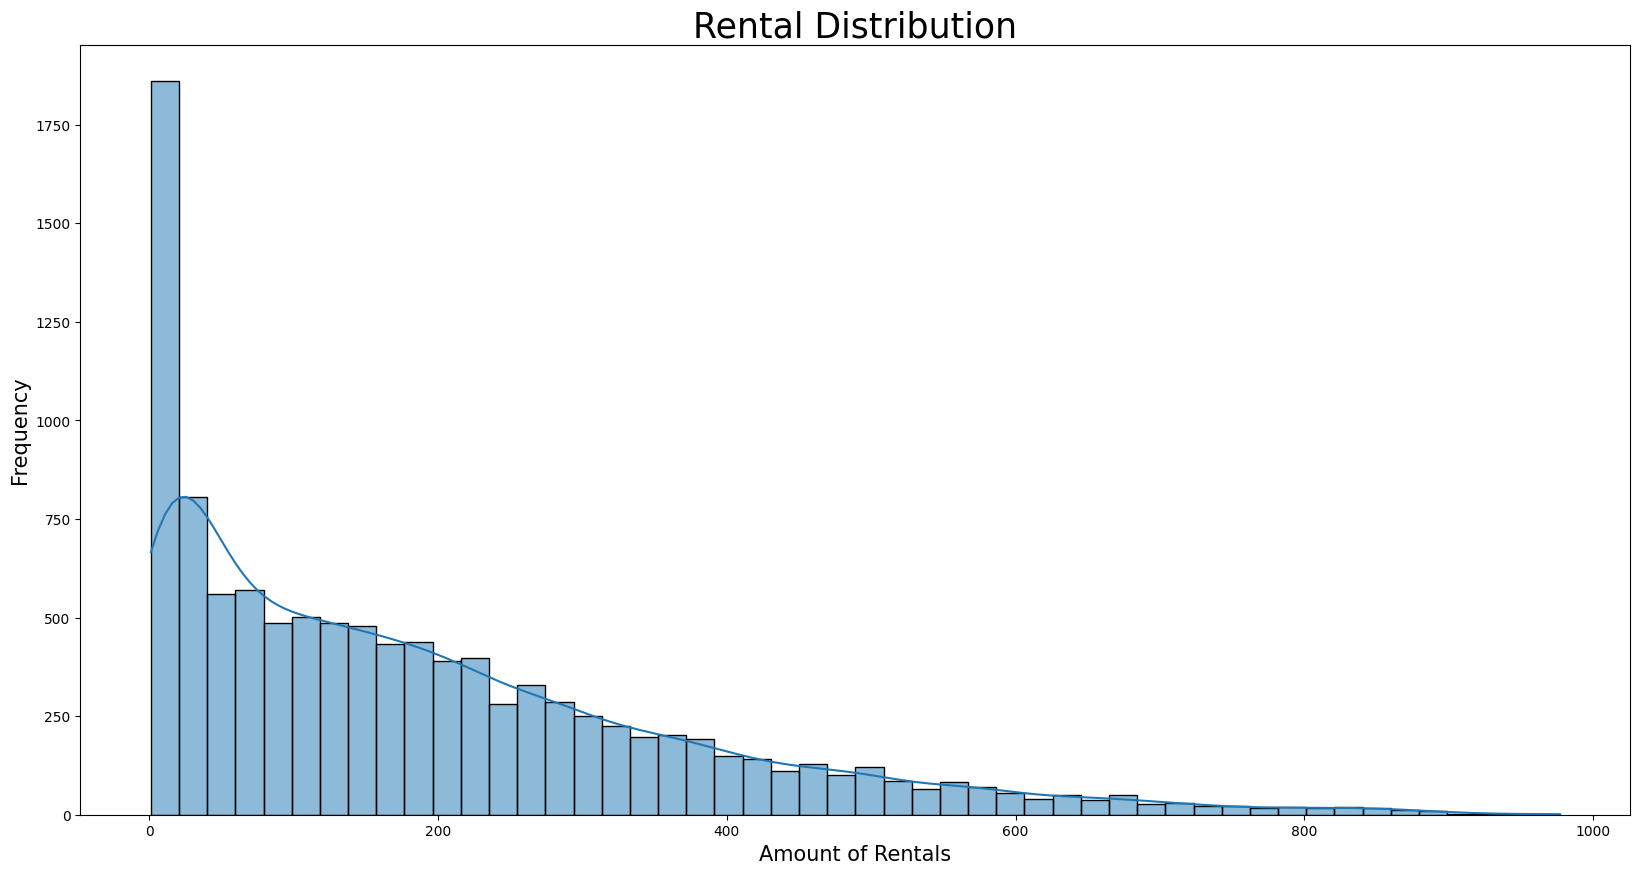

In [141]:
plt.figure(figsize=(20,10))
sns.histplot(train['count'], bins=50, kde=True)
plt.title('Rental Distribution', fontsize=25)
plt.xlabel("Amount of Rentals", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()

*Due to data being right skewed applying 1- log transformation*

In [142]:
train['log_count'] = np.log1p(train['count'])

*Visualizing the bike rental distribution after 1- log transformation*

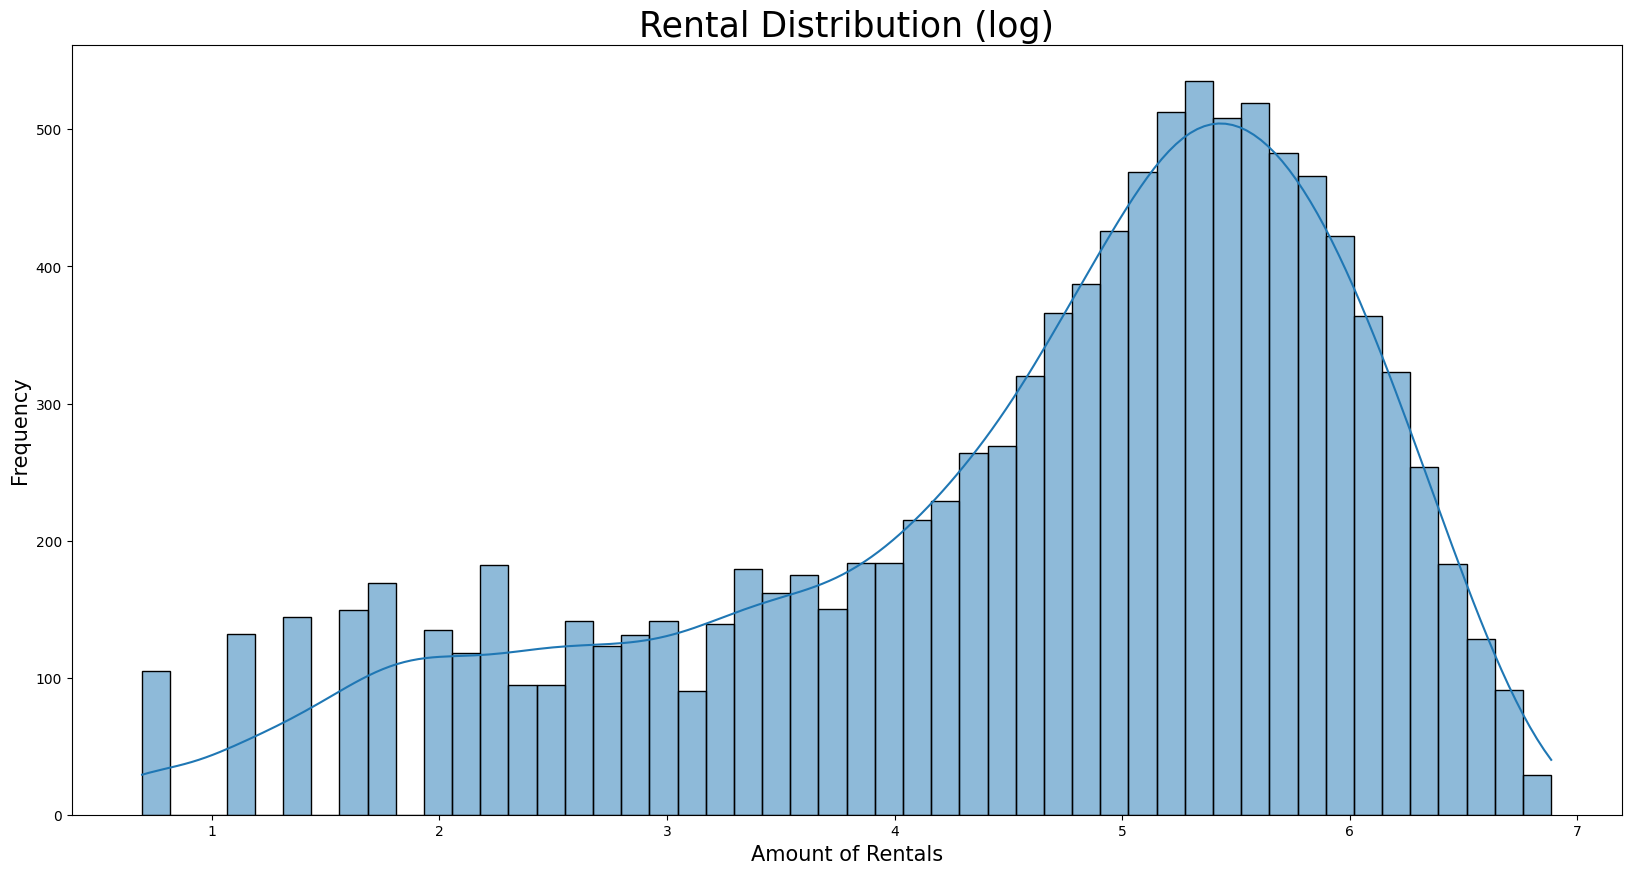

In [143]:
plt.figure(figsize=(20,10))
sns.histplot(train['log_count'], bins=50, kde=True)
plt.title('Rental Distribution (log)', fontsize=25)
plt.xlabel("Amount of Rentals", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()

<!-- *Converting the datetime column to datetime object* -->

*Converting datetime column which is in object format to datetime format for future feature extraction*

In [144]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

<!-- *Extracting additional features from datetime* -->

*Iterating over train and test extracting datetime features and adding certain bool features*

In [145]:
for i in [train, test]:
	i['hour'] = i['datetime'].dt.hour
	i['day'] = i['datetime'].dt.day
	i['month'] = i['datetime'].dt.month
	i['weekday'] = i['datetime'].dt.weekday
	i['year'] = i['datetime'].dt.year
	i['weekend_bool'] = i['weekday'] >= 5
	i["rushhour_bool"] = ((i['hour'] >= 7) & (i['hour'] <= 9) | ((i['hour'] >= 16) & (i['hour'] <= 19)))

<!-- *Visualization of patterns of renting by month and by year* -->

*Visualizing Rental Pattern over months and coloring by year*

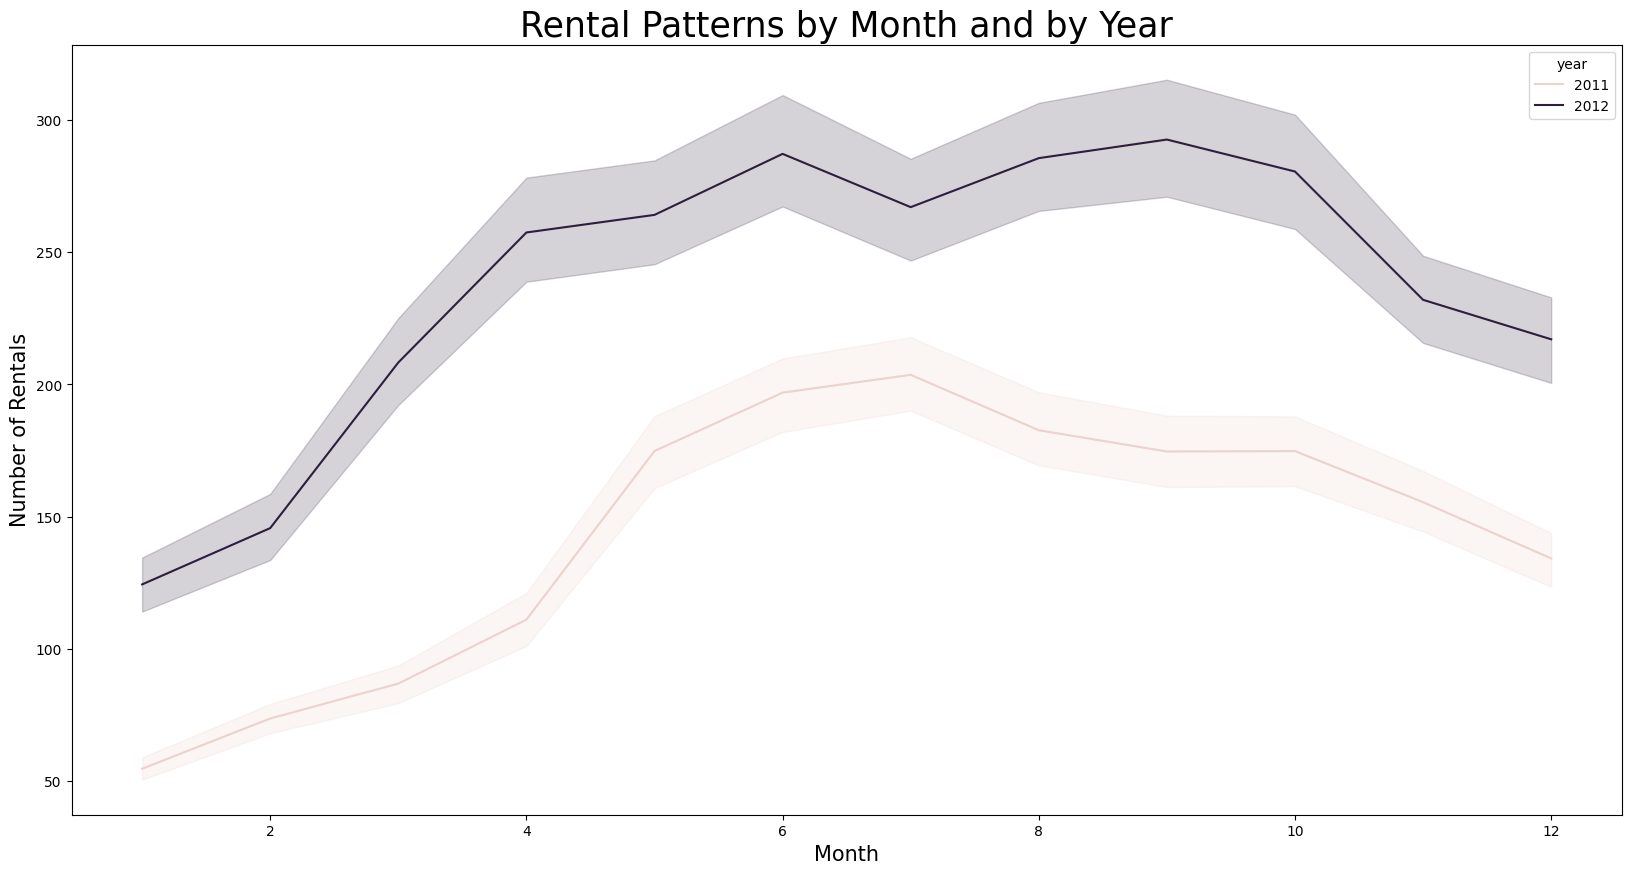

In [146]:
plt.figure(figsize=(20,10))
sns.lineplot(data=train, x='month', y='count', hue='year')
plt.title('Rental Patterns by Month and by Year', fontsize=25)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Rentals', fontsize=15)
plt.show()

<!-- *Visualization of patterns of renting by hour and by weekday* -->

*Visualizing Rental Pattern over hour and coloring by weekday 0 = Sunday 6 = Saturday*

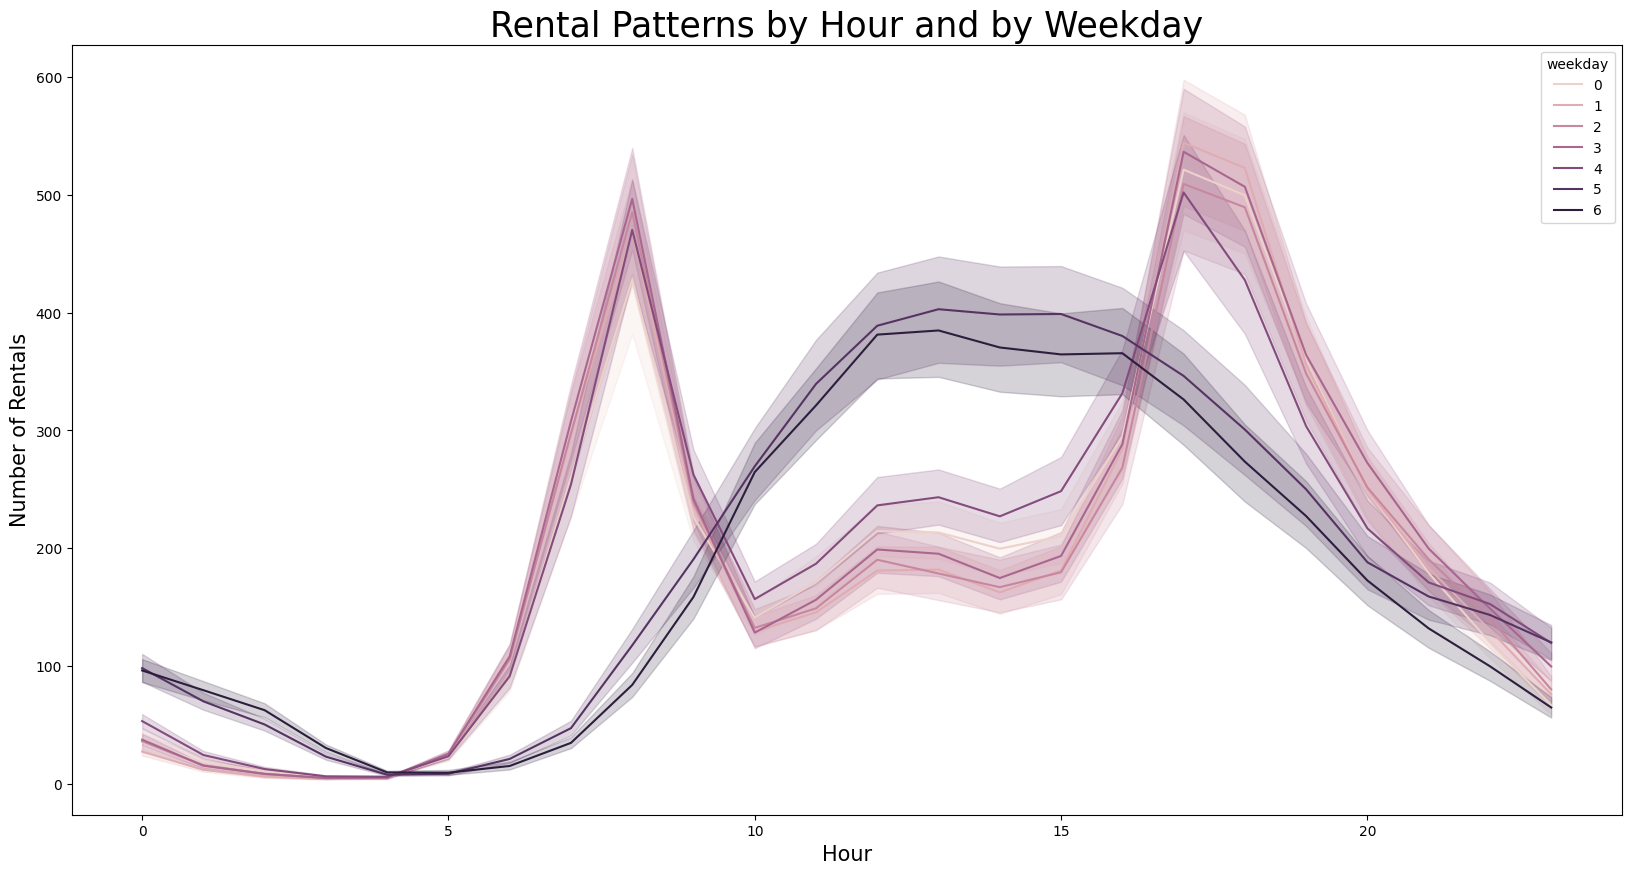

In [147]:
plt.figure(figsize=(20,10))
sns.lineplot(data=train, x='hour', y='count', hue='weekday')
plt.title('Rental Patterns by Hour and by Weekday', fontsize=25)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Number of Rentals', fontsize=15)
plt.show()

<!-- *Effect of Weather on Bike rentals* -->

*Visualizing weather impact on the number of rentals*

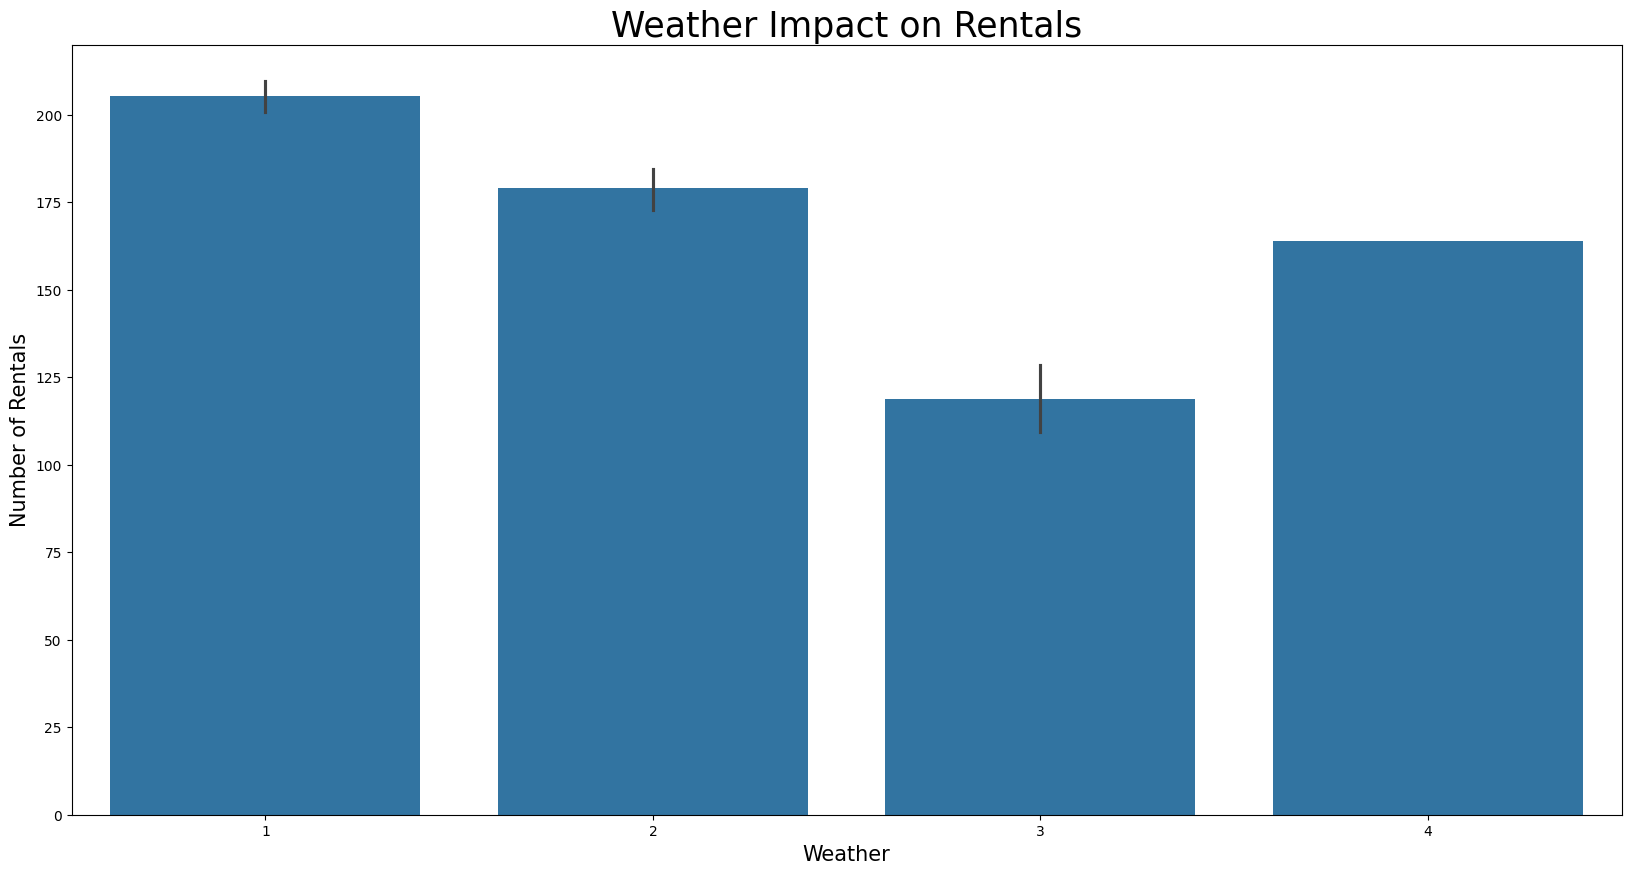

In [148]:
plt.figure(figsize=(20,10))
sns.barplot(data=train, x='weather', y='count')
plt.title('Weather Impact on Rentals', fontsize=25)
plt.xlabel('Weather', fontsize=15)
plt.ylabel('Number of Rentals', fontsize=15)
plt.show()

<!-- *Effect of Temperature on Bike Rentals* -->

*Visualizing temperature impact on the number of rentals and rush hour*

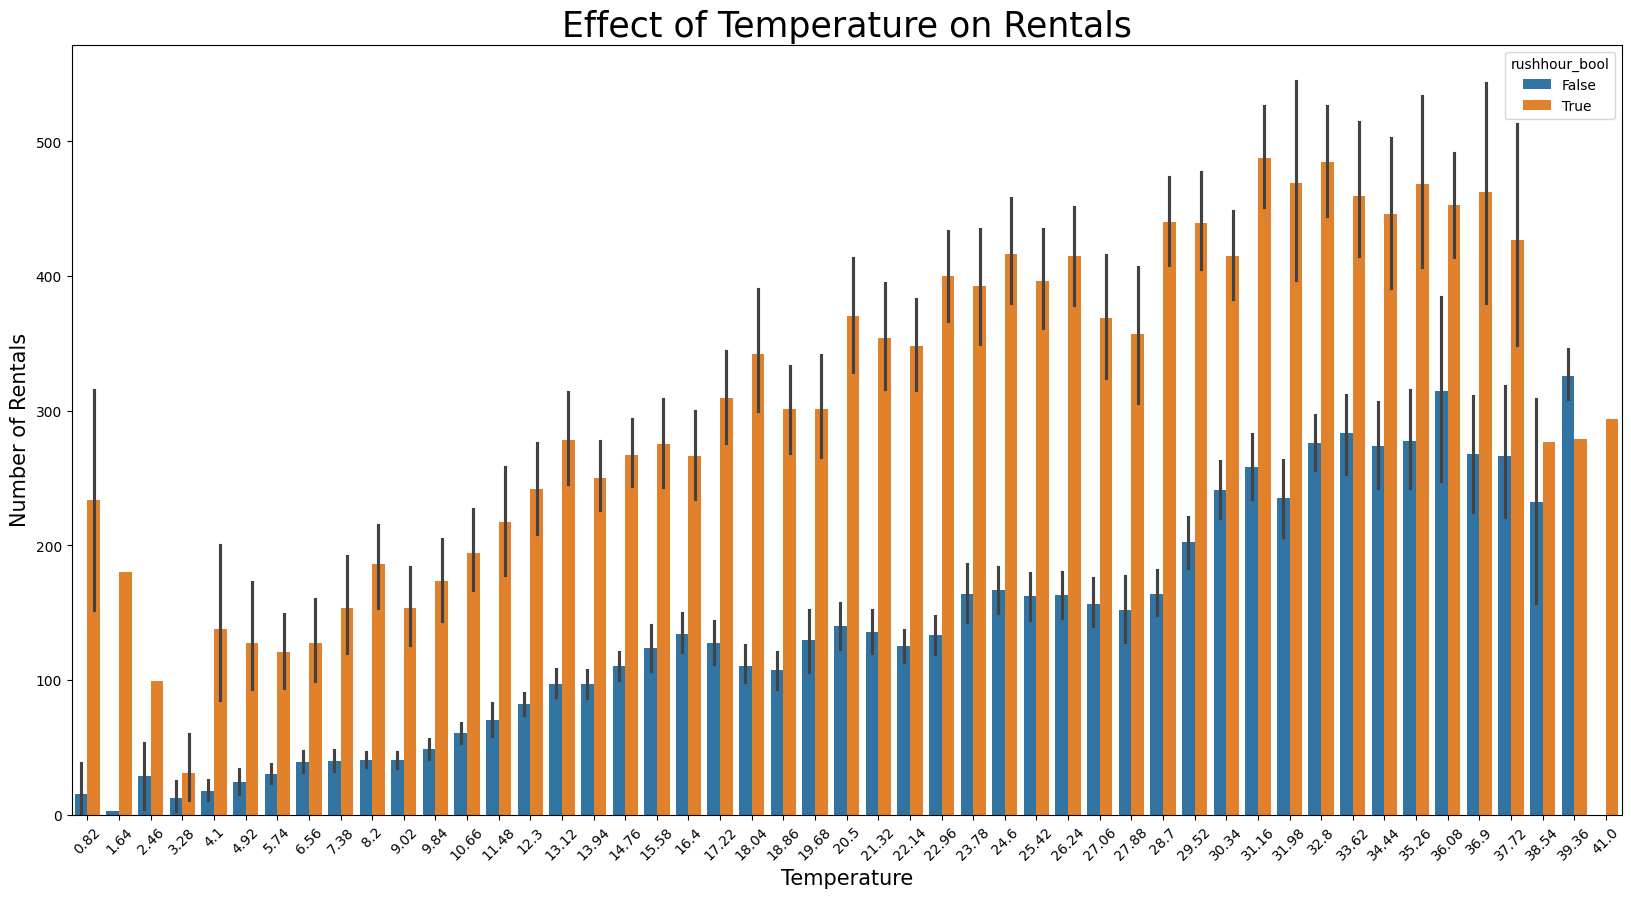

In [149]:
plt.figure(figsize=(20,10))
sns.barplot(data=train, x='temp', y='count', hue='rushhour_bool')
plt.title('Effect of Temperature on Rentals', fontsize=25)
plt.xlabel('Temperature', fontsize=15)
plt.ylabel('Number of Rentals', fontsize=15)
plt.xticks(rotation=45)
plt.show()

<!-- # SECOND MODEL -->

<!-- *Creating new TabularDataset to fit second model* -->

*Dropping target variable as the new 1 - log transformed target variable is present*

In [150]:
train = train.drop('count', axis=1)

*Converting the set to tabular dataset for Autogluon*

In [151]:
train_2 = TabularDataset(train)
test_2 = TabularDataset(test)

<!-- *Training the second model* -->

In [152]:
predictor_2 = TabularPredictor(label='log_count', eval_metric='root_mean_squared_error').fit(train_data=train_2)

No path specified. Models will be saved in: "AutogluonModels\ag-20250323_102321"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          16
Memory Avail:       7.25 GB / 15.42 GB (47.0%)
Disk Space Avail:   83.03 GB / 456.29 GB (18.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         

[1000]	valid_set's rmse: 0.303511
[2000]	valid_set's rmse: 0.299463


	-0.2989	 = Validation score   (-root_mean_squared_error)
	2.75s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.294578
[2000]	valid_set's rmse: 0.29347


	-0.2931	 = Validation score   (-root_mean_squared_error)
	2.02s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.3253	 = Validation score   (-root_mean_squared_error)
	1.62s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost ...
	-0.2836	 = Validation score   (-root_mean_squared_error)
	12.78s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.3193	 = Validation score   (-root_mean_squared_error)
	0.77s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.3375	 = Validation score   (-root_mean_squared_error)
	7.21s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-0.2965	 = Validation score   (-root_mean_squared_error)
	1.05s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.3013	 = Validation score   (-root_mean_squared_error)
	143.28s	 = Training   runtime
	0.01s	 = Validation ru

[1000]	valid_set's rmse: 0.294853


	-0.2944	 = Validation score   (-root_mean_squared_error)
	2.19s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'CatBoost': 0.48, 'NeuralNetTorch': 0.28, 'LightGBMLarge': 0.12, 'KNeighborsDist': 0.04, 'LightGBM': 0.04, 'XGBoost': 0.04}
	-0.2761	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 175.6s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 13790.0 rows/s (1089 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("c:\Users\ASUS ROG\Desktop\Project AWS\AutogluonModels\ag-20250323_102321")


<!-- *Second model Summary* -->

In [153]:
display(predictor_2.fit_summary())

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.276129  root_mean_squared_error       0.078970  161.365818                0.000000           0.016003            2       True         12
1              CatBoost  -0.283582  root_mean_squared_error       0.003002   12.783134                0.003002          12.783134            1       True          6
2              LightGBM  -0.293066  root_mean_squared_error       0.018057    2.019390                0.018057           2.019390            1       True          4
3         LightGBMLarge  -0.294434  root_mean_squared_error       0.010003    2.189495                0.010003           2.189495            1       True         11
4               XGBoost  -0.296533  root_mean_squared_error       0.009051    1.046556                0.009051   

d:\miniconda3\envs\auto_python310\lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
d:\miniconda3\envs\auto_python310\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -0.6991793687204798,
  'KNeighborsDist': -0.5590516809281377,
  'LightGBMXT': -0.29894867448223206,
  'LightGBM': -0.29306561092629035,
  'RandomForestMSE': -0.3252699882481743,
  'CatBoost': -0.2835817707031899,
  'ExtraTreesMSE': -0.31932815171539597,
  'NeuralNetFastAI': -0.3374670959858991,
  'XGBoost': -0.2965332270252427,
  'NeuralNetTorch': -0.30128604920843965,
  'LightGBMLarge': -0.29443376443497393,
  'WeightedEnsemble_L2': -0.276128877907523},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUn

In [154]:
display(predictor_2.leaderboard(silent=True))

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.276129,root_mean_squared_error,0.078970,161.365818,0.000000,0.016003,2,True,12
1,CatBoost,-0.283582,root_mean_squared_error,0.003002,12.783134,0.003002,12.783134,1,True,6
2,LightGBM,-0.293066,root_mean_squared_error,0.018057,2.019390,0.018057,2.019390,1,True,4
3,LightGBMLarge,-0.294434,root_mean_squared_error,0.010003,2.189495,0.010003,2.189495,1,True,11
4,XGBoost,-0.296533,root_mean_squared_error,0.009051,1.046556,0.009051,1.046556,1,True,9
5,LightGBMXT,-0.298949,root_mean_squared_error,0.017004,2.748621,0.017004,2.748621,1,True,3
6,NeuralNetTorch,-0.301286,root_mean_squared_error,0.008001,143.284235,0.008001,143.284235,1,True,10
7,ExtraTreesMSE,-0.319328,root_mean_squared_error,0.048014,0.769177,0.048014,0.769177,1,True,7
8,RandomForestMSE,-0.325270,root_mean_squared_error,0.064013,1.620109,0.064013,1.620109,1,True,5
9,NeuralNetFastAI,-0.337467,root_mean_squared_error,0.010526,7.208895,0.010526,7.208895,1,True,8


<!-- *Predicting on the test set* -->

In [155]:
predictor_2_pred_log = predictor_2.predict(test_2)

<!-- *Reverting the prediction from log to normal* -->

In [156]:
predictor_2_pred = np.expm1(predictor_2_pred_log)

<!-- *Making sure no negative values are present* -->

In [157]:
predictor_2_pred = np.maximum(0, predictor_2_pred)

<!-- *Creating secondary submission file for Kaggle* -->

In [158]:
submission_2 = pd.DataFrame(
	{
		'datetime' : test_2['datetime'],
		'count' : predictor_2_pred
	}
)

In [159]:
submission_2.to_csv('secondary_submission_resubmission.csv', index=False)

In [160]:
!kaggle competitions submit -c bike-sharing-demand -f secondary_submission_resubmission.csv -m "Secondary Submission Resubmission"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  8%|▊         | 16.0k/194k [00:00<00:02, 76.5kB/s]
 58%|█████▊    | 112k/194k [00:00<00:00, 359kB/s]  
100%|██████████| 194k/194k [00:01<00:00, 163kB/s]


# TERTIARY TRAINING

# ADDITIONAL FEATURE ENGINEERING

*Converting Features to Categorical Format*

*Creating a list to iterate over*

In [161]:
cat_features = ['weather', 'year', 'month', 'weekday']

In [162]:
for i in cat_features:
	train_2[i] = train[i].astype('category')
	test_2[i] = test[i].astype('category')

*Bool Features are converted to int to be binary*

In [163]:
train_2['rushhour_bool'] = train_2['rushhour_bool'].astype(int)
test_2['rushhour_bool'] = test_2['rushhour_bool'].astype(int)

In [164]:
train_2['weekend_bool'] = train_2['weekend_bool'].astype(int)
test_2['weekend_bool'] = test_2['weekend_bool'].astype(int)

*Adding additional Polynomial Features*

In [165]:
train_2['temp_humidity'] = train_2['temp'] * train_2['humidity']
test_2['temp_humidity'] = test_2['temp'] * test_2['humidity']

train_2['windspeed_temp'] = train_2['temp'] * train_2['windspeed']
test_2['windspeed_temp'] = test_2['temp'] * test_2['windspeed']

train_2['workday_hour'] = train_2['workingday'] * train_2['hour']
test_2['workday_hour'] = test_2['workingday'] * test_2['hour']

*Setting Hyperparameters*

*NOTE: Unfortunately additional model specific hyperparameters do not work with kwargs and presets*

In [166]:
hyperparameter_tune_kwargs = {
	'searcher' : "bayesopt",
	"num_trials" : 20
}

In [167]:
predictor_3 = TabularPredictor(label='log_count', eval_metric='root_mean_squared_error').fit(train_data=train_2, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20250323_102622"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          16
Memory Avail:       7.38 GB / 15.42 GB (47.9%)
Disk Space Avail:   82.53 GB / 456.29 GB (18.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout 

In [168]:
predictor_3.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.267679  root_mean_squared_error       0.341913  6.185567                0.000000           0.004296            2       True          2
1  LightGBMLarge_BAG_L1  -0.267679  root_mean_squared_error       0.341913  6.181271                0.341913           6.181271            1       True          1
2   WeightedEnsemble_L3  -0.267679  root_mean_squared_error       0.342914  6.198274                0.001001           0.017004            3       True          4
3  LightGBMLarge_BAG_L2  -0.280922  root_mean_squared_error       0.422795  8.945284                0.080882           2.764014            2       True          3
Number of models trained: 4
Types of models trained:
{'WeightedEnsembleModel', 'StackerEnsembleModel_LGB'}
Bagging used: Tr

d:\miniconda3\envs\auto_python310\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMLarge_BAG_L1': -0.26767871904301854,
  'WeightedEnsemble_L2': -0.26767871904301854,
  'LightGBMLarge_BAG_L2': -0.2809216033557512,
  'WeightedEnsemble_L3': -0.26767871904301854},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBMLarge_BAG_L1': ['LightGBMLarge_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'LightGBMLarge_BAG_L2': ['LightGBMLarge_BAG_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'LightGBMLarge_BAG_L1': 6.181270599365234,
  'WeightedEnsemble_L2': 0.004296302795410156,
  'LightGBMLarge_BAG_L2': 2.7640137672424316,
  'WeightedEnsemble_L3': 0.017003774642944336},
 'model_pred_times': {'LightGBMLarge_BAG_L1': 0.34191298484802246,
  'WeightedEnsemble_L2': 0.0,
  'Li

In [179]:
pred_3_leaderboard = predictor_3.leaderboard(silent=True)
display(pred_3_leaderboard)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.267679,root_mean_squared_error,0.341913,6.185567,0.000000,0.004296,2,True,2
1,LightGBMLarge_BAG_L1,-0.267679,root_mean_squared_error,0.341913,6.181271,0.341913,6.181271,1,True,1
2,WeightedEnsemble_L3,-0.267679,root_mean_squared_error,0.342914,6.198274,0.001001,0.017004,3,True,4
3,LightGBMLarge_BAG_L2,-0.280922,root_mean_squared_error,0.422795,8.945284,0.080882,2.764014,2,True,3


In [172]:
train_2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,log_count,hour,day,month,weekday,year,weekend_bool,rushhour_bool,temp_humidity,windspeed_temp,workday_hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,2.833213,0,1,1,5,2011,1,0,797.04,0.000000,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,3.713572,1,1,1,5,2011,1,0,721.60,0.000000,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,3.496508,2,1,1,5,2011,1,0,721.60,0.000000,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,2.639057,3,1,1,5,2011,1,0,738.00,0.000000,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.693147,4,1,1,5,2011,1,0,738.00,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,5.820083,19,19,12,2,2012,0,1,779.00,405.122066,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,5.488938,20,19,12,2,2012,0,0,841.32,221.419188,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,5.129899,21,19,12,2,2012,0,0,850.34,209.118122,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,4.867534,22,19,12,2,2012,0,0,850.34,83.684608,22


In [ ]:
predictor_3_pred_log = predictor_3.predict(test_2)

In [ ]:
predictor_3_pred = np.expm1(predictor_3_pred_log)

In [ ]:
predictor_3_pred = np.maximum(0, predictor_3_pred)

In [ ]:
submission_3 = pd.DataFrame(
	{
		'datetime' : test_2['datetime'],
		'count' : predictor_3_pred
	}
)

In [ ]:
submission_3.to_csv('tertiary_submission_resubmission.csv', index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f tertiary_submission_resubmission.csv -m "Tertiary Submission Resubmission"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  8%|▊         | 16.0k/194k [00:00<00:02, 86.5kB/s]
 58%|█████▊    | 112k/194k [00:00<00:00, 375kB/s]  
100%|██████████| 194k/194k [00:01<00:00, 167kB/s]


*NOTE: Main submissions are the top 3 ones dated (2025/03/22) please ignore all other ones*

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand

fileName                               date                        description                                                                                                                                                                                                                                   status                     publicScore  privateScore  
-------------------------------------  --------------------------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  -------------------------  -----------  ------------  
tertiary_submission_resubmission.csv   2025-03-23 10:19:06         Tertiary Submission Resubmission                                                                                                                                                                                     

# DATA VISUALIZATION

In [ ]:
best_model_predictor_3 = pred_3_leaderboard.iloc[0]

In [ ]:
m_vals = {
	"Score (Validation)" : best_model_predictor_3['score_val'],
	"Time (Prediction)" : best_model_predictor_3['pred_time_val'],
	'Time (Training)' : best_model_predictor_3['fit_time']
}

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_24028\2725504302.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'Best Model Performance : {best_model_predictor_3[0]}' ,fontsize=25)


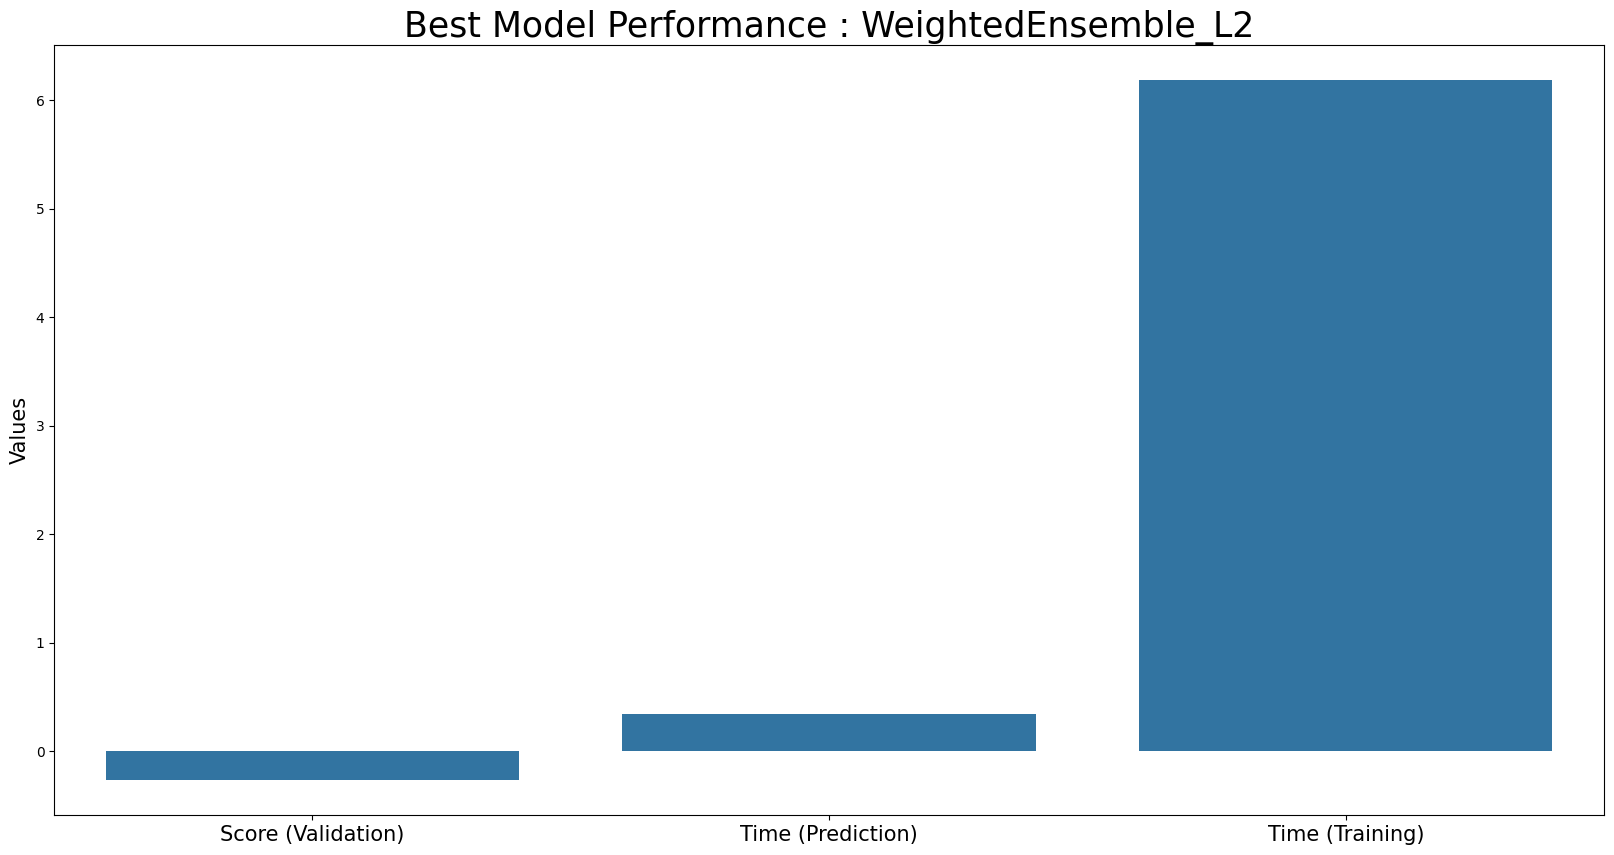

In [190]:
plt.figure(figsize=(20,10))
sns.barplot(x=m_vals.keys(), y=m_vals.values())
plt.title(f'Best Model Performance : {best_model_predictor_3[0]}' ,fontsize=25)
plt.ylabel('Values', fontsize=15)
plt.xticks(fontsize=15)
plt.show()

*Extracting Scores*

In [ ]:
scores_non_log = [
	predictor_1.leaderboard(silent=True)['score_val'].min(),
	predictor_2.leaderboard(silent=True)['score_val'].min(),
	predictor_3.leaderboard(silent=True)['score_val'].min()
]

In [ ]:
scores_non_log

[-138.391912989268, -0.6991793687204798, -0.2809216033557512]

In [ ]:
model_hist = ['Initial Model', 'Secondary Model', 'Tertiary Model']

*Reverting Log Transformation*

In [ ]:
scores = [np.expm1(i) for i in scores_non_log]

In [ ]:
scores

[-1.0, -0.5030070155204658, -0.24491247051170212]

*PLotting the Data*

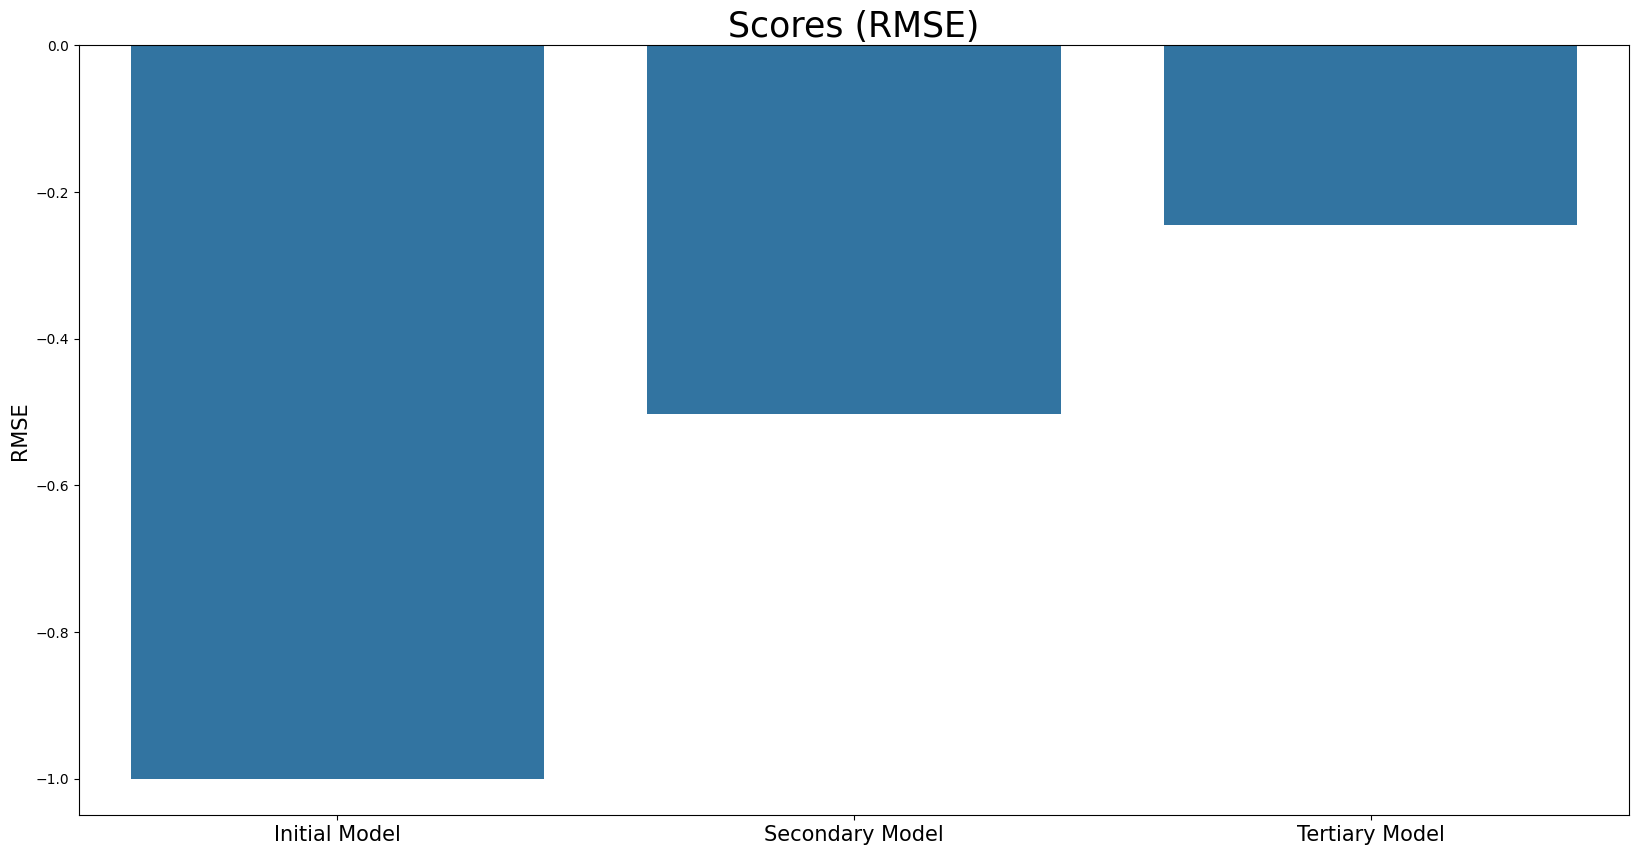

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=model_hist, y=scores)
plt.title('Scores (RMSE)' ,fontsize=25)
plt.ylabel('RMSE', fontsize=15)
plt.xticks(fontsize=15)
plt.show()

*Kaggle Scores*

In [ ]:
kaggle = [1.86413, 0.42063, 0.42091]

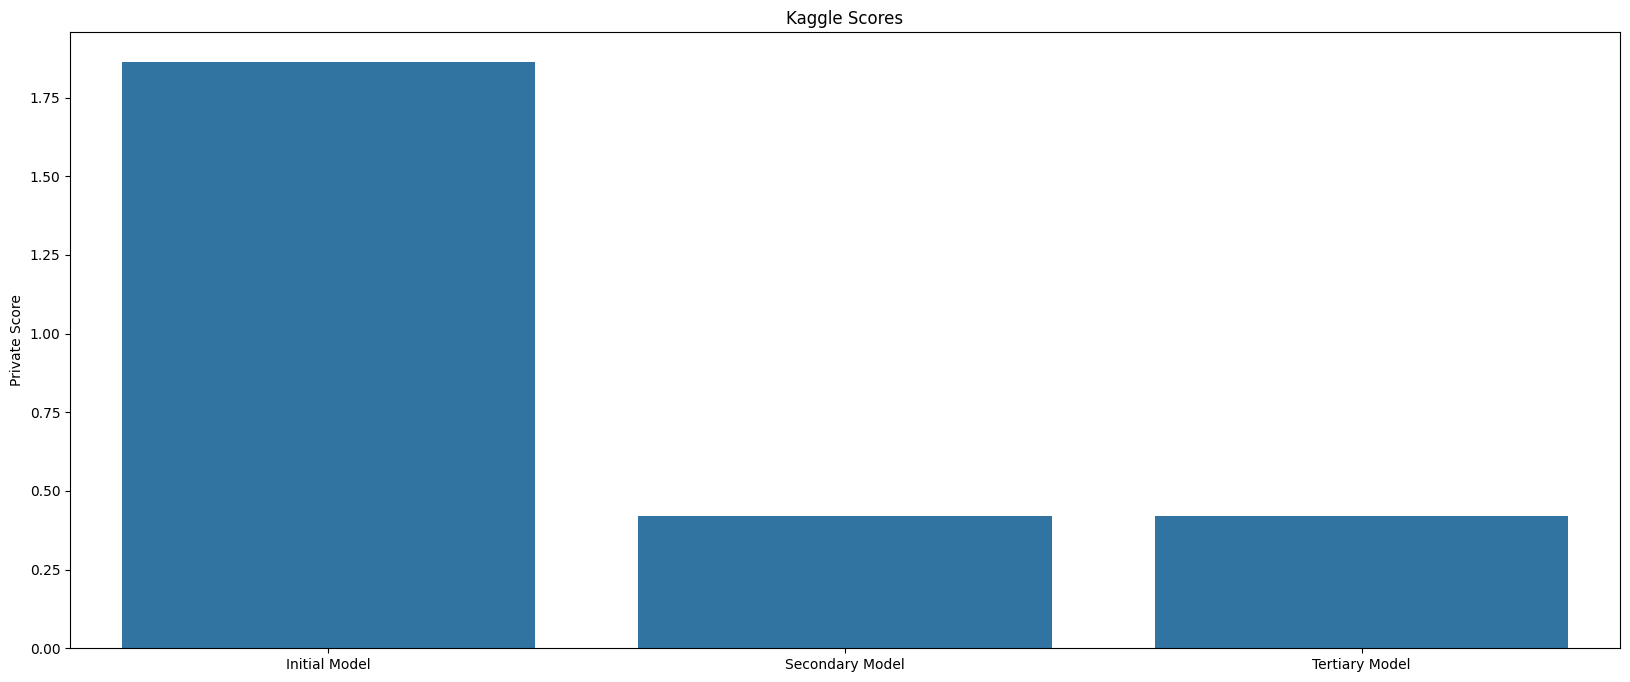

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=model_hist, y=kaggle)
plt.title('Kaggle Scores')
plt.ylabel('Private Score')
plt.show()

In [ ]:
report_df = pd.DataFrame({
	"Model Stage" : model_hist,
	"Score (RMSE)" : scores,
	"Score (Kaggle)" : kaggle,
	"Changes" : ['Default', 'Feature Engineered \ Cleaned', 'Tuned, Additional Features']
})

In [ ]:
display(report_df)

,Model Stage,Score (RMSE),Score (Kaggle),Changes
0,Initial Model,-1.000000,1.86413,Default
1,Secondary Model,-0.503007,0.42063,Feature Engineered \ Cleaned
2,Tertiary Model,-0.244912,0.42091,"Tuned, Additional Features"


In [ ]:
md_report = report_df.to_markdown(index=False)

In [ ]:
print(md_report)

| Model Stage     |   Score (RMSE) |   Score (Kaggle) | Changes                      |
|:----------------|---------------:|-----------------:|:-----------------------------|
| Initial Model   |      -1        |          1.86413 | Default                      |
| Secondary Model |      -0.503007 |          0.42063 | Feature Engineered \ Cleaned |
| Tertiary Model  |      -0.244912 |          0.42091 | Tuned, Additional Features   |


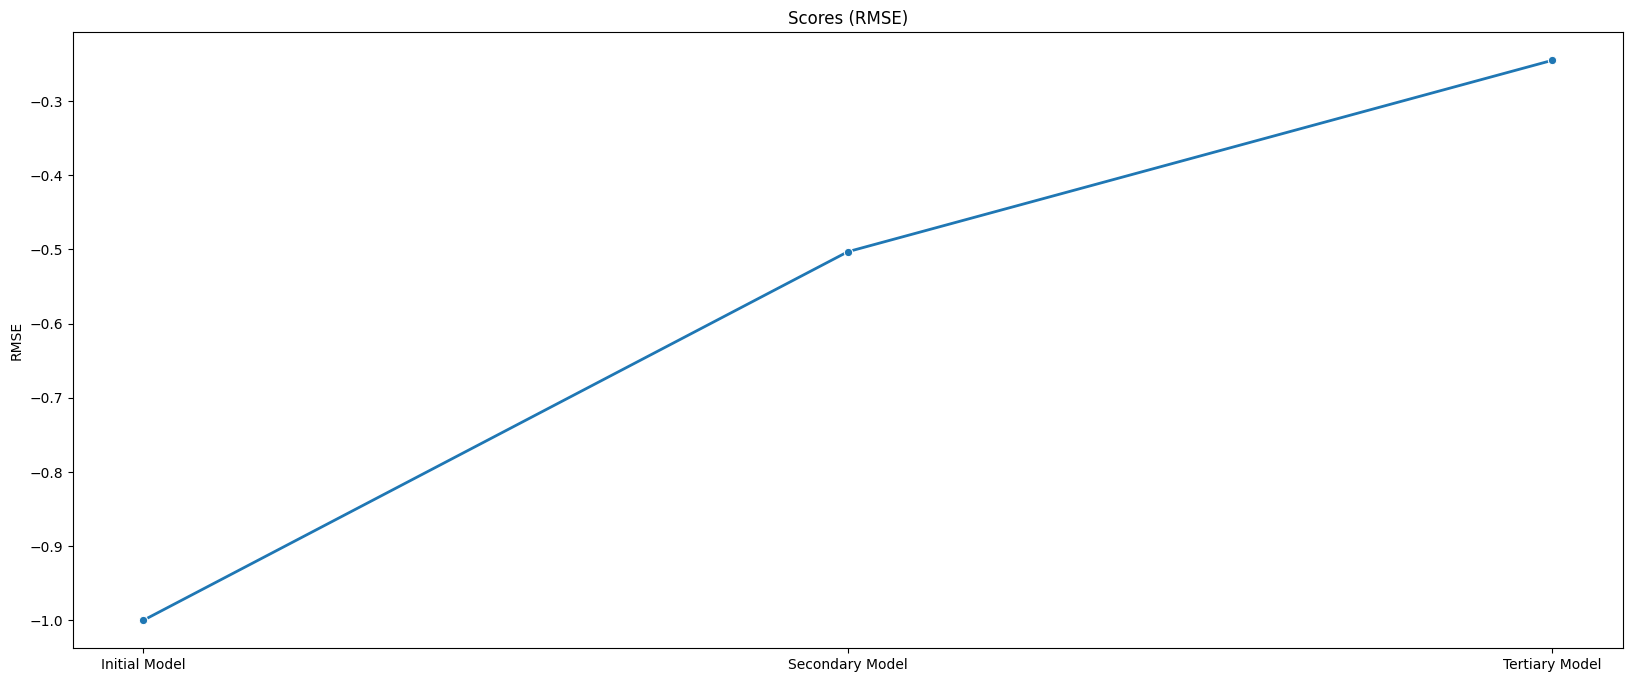

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=model_hist, y=scores, marker="o", linewidth=2)
plt.title('Scores (RMSE)')
plt.ylabel('RMSE')
plt.show()

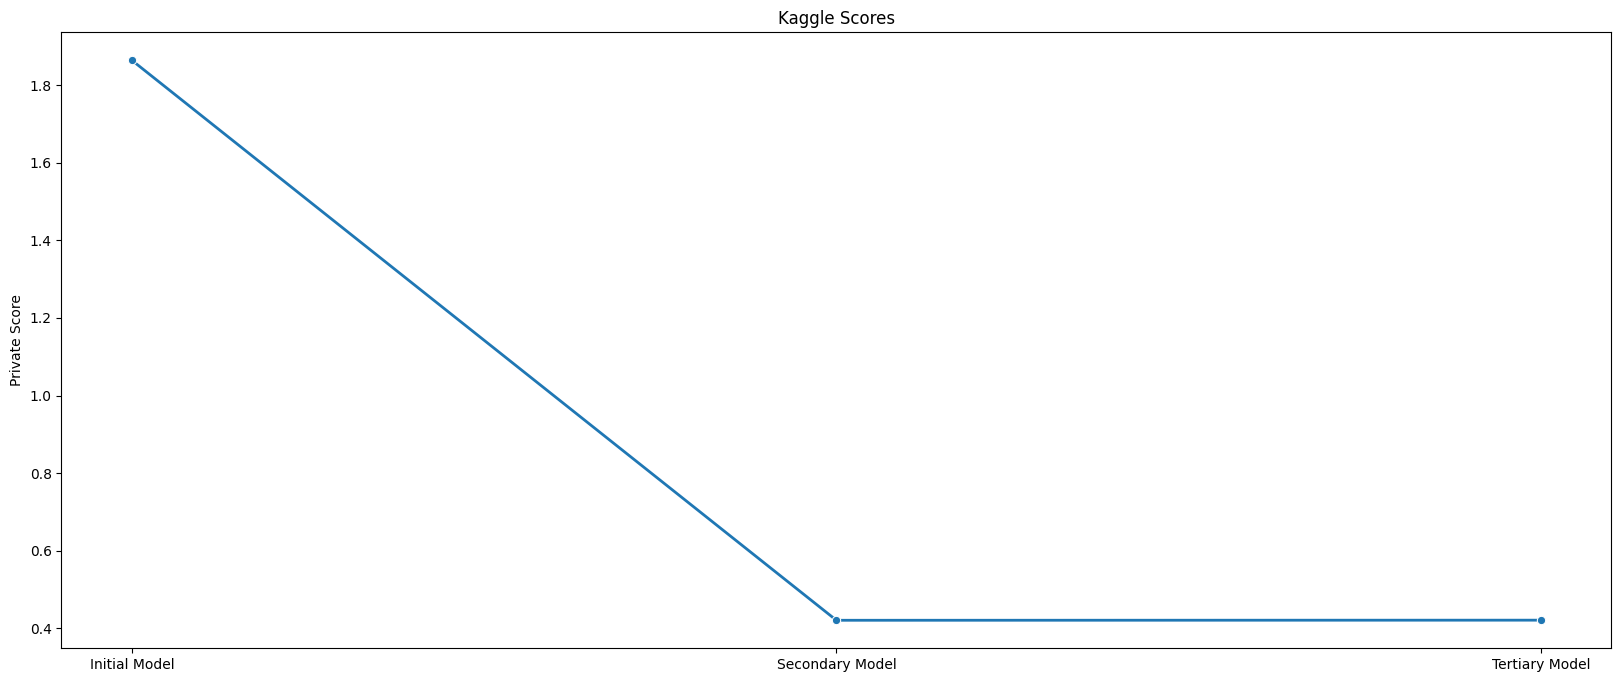

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=model_hist, y=kaggle, marker="o", linewidth=2)
plt.title('Kaggle Scores')
plt.ylabel('Private Score')
plt.show()